# Only plotting, for classifiers!

In [21]:
%load_ext autoreload
%autoreload 2
#import libraries and some constants


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm
import pandas as pd
import uproot as ur
import atlas_mpl_style as ampl
ampl.use_atlas_style()

path_prefix = '/Users/swiatlow/Documents/Code/LCStudies/'
plotpath = path_prefix+'classifier/Plots/'
modelpath = path_prefix+'classifier/Models/'#import libraries and some constants

# import our resolution utilities

import sys
sys.path.append(path_prefix)
from  util import resolution_util as ru
from  util import plot_util as pu
from  util import ml_util as mu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
inputpath = '/Users/swiatlow/Data/caloml/processed_data/'
pdata_merged = pd.read_pickle(inputpath+'pdata_merged.pkl')

In [23]:
plabels = np.load(inputpath+'pdata_labels.npy')
combine_score = np.load(inputpath+'pdata_combine_score.npy')
scores_p1_d02 = np.load(inputpath+'pdata_p1_d02.npy')
scores_dense_d02 = np.load(inputpath+'scores_dense_d02.npy')

In [24]:
# set plotsytle choices here
params = {'legend.fontsize': 13,
          'axes.labelsize': 18}
plt.rcParams.update(params)

ampl.set_color_cycle('Oceanic',10)

<Figure size 576x432 with 0 Axes>

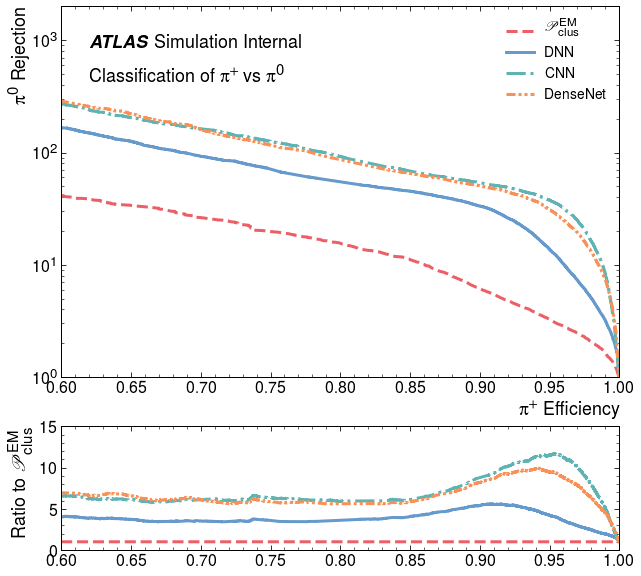

In [25]:
pu.roc_plot_scores([1-pdata_merged.cluster_EM_PROBABILITY.to_numpy(),  combine_score[:,1], scores_p1_d02[:,1], scores_dense_d02[:,1]], plabels, pdata_merged, 
            figfile = plotpath+'model_compare_wide.pdf',
            labels = ['$\mathcal{P}^{EM}_{clus}$', 'DNN','CNN', 'DenseNet'],
            x_min = 0.6, x_max = 1.0, y_min = 1, y_max = 2000, 
            x_log = False, y_log = True, rejection = True, 
            x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            linestyles = ['dashed','solid', 'dashdot', (0, (3, 1, 1, 1, 1, 1))], colorgrouping = -1,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'}])

<Figure size 576x432 with 0 Axes>

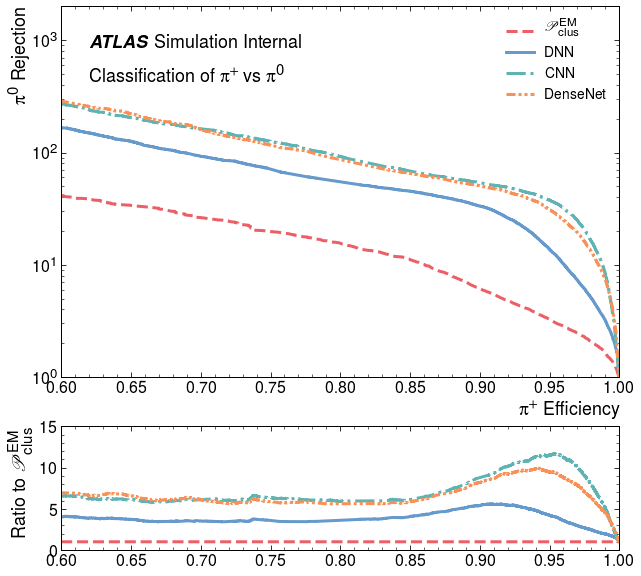

In [26]:
pu.roc_plot_scores([1-pdata_merged.cluster_EM_PROBABILITY.to_numpy(),  combine_score[:,1], scores_p1_d02[:,1], scores_dense_d02[:,1]], plabels, pdata_merged, 
            figfile = plotpath+'model_compare_wide_wratio.pdf',
            labels = ['$\mathcal{P}^{EM}_{clus}$', 'DNN','CNN', 'DenseNet'],
            x_min = 0.6, x_max = 1.0, y_min = 1, y_max = 2000, 
            x_log = False, y_log = True, rejection = True, 
            x_label = '$\pi^{+}$ Efficiency', y_label = '$\pi^{0}$ Rejection',
            atlas_x = 0.05, atlas_y = 0.925, simulation = True,
            linestyles = ['dashed','solid', 'dashdot', (0, (3, 1, 1, 1, 1, 1))], colorgrouping = -1,
            textlist = [{'x': 0.05, 'y': 0.8, 'text': 'Classification of $\pi^{+}$ vs $\pi^{0}$'}])

In [27]:
varlist = []
cluster_e = pu.rocVar(
    name='clusterE',
    bins=[1,10,50,500],
    df=pdata_merged,
    latex='Cluster E',
    vlist=varlist,
)

In [28]:
rocs = pu.buildRocs(varlist, [1-pdata_merged.cluster_EM_PROBABILITY.to_numpy(), scores_p1_d02[:,1]], ['$\mathcal{P}^{EM}_{clus}$','CNN'], plabels, pdata_merged)

In [29]:
e_range = ['Cluster E<1', '1<Cluster E<10', '10<Cluster E<50', '50<Cluster E<500']
c_range = ['$\mathcal{P}^{EM}_{clus}$','CNN']

    

In [30]:
rocs_lc = {}
rocs_cnn = {}
for e_item in e_range:
    rocs_lc[e_item] = rocs[c_range[0]+e_item]
    rocs_cnn[e_item] = rocs[c_range[1]+e_item]


In [31]:
rat = {}
x = {}
for e_item in e_range:
    xcnn=rocs_cnn[e_item]['x']
    ycnn=rocs_cnn[e_item]['y']

    xlc = rocs_lc[e_item]['x']
    ylc = rocs_lc[e_item]['y']

    ratx, raty = pu.build_ratio(xlc, ylc, xcnn, ycnn)
    rat[e_item] = raty
    x[e_item] = ratx




<Figure size 576x432 with 0 Axes>

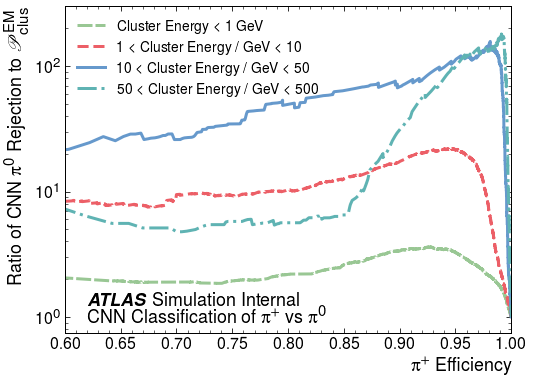

In [34]:
pu.lineOverlayManyX(x=[x['Cluster E<1'], x['1<Cluster E<10'], x['10<Cluster E<50'], x['50<Cluster E<500']], lines = [rat['Cluster E<1'], rat['1<Cluster E<10'], rat['10<Cluster E<50'], rat['50<Cluster E<500']],
                labels = ['Cluster Energy < 1 GeV', '1 < Cluster Energy / GeV < 10', '10 < Cluster Energy / GeV < 50', '50 < Cluster Energy / GeV < 500'],
                xlabel = '$\pi^{+}$ Efficiency', ylabel = 'Ratio of $CNN~\pi^0$ Rejection to $\mathcal{P}^{EM}_{clus}$',
                figfile = plotpath+'model_compare_wide_energy.pdf',
                x_min = 0.6, x_max = 1.0 ,y_min = 0.75, y_max = 300, y_log = True, x_log = False,
                 linestyles = [(0, (5, 1)), 'dashed','solid', 'dashdot', (0, (3, 1, 1, 1, 1, 1)) ],
                atlas_x = 0.05, atlas_y = 0.125, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.0325, 'text': 'CNN Classification of $\pi^{+}$ vs $\pi^{0}$'}])

<Figure size 576x432 with 0 Axes>

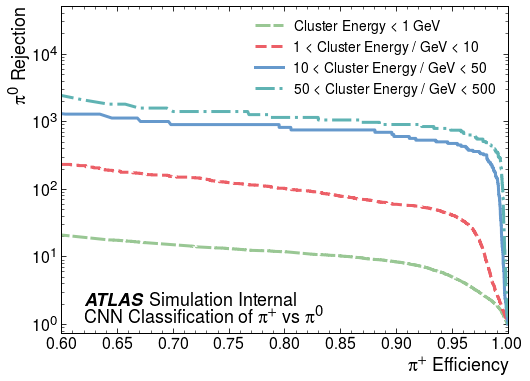

In [35]:
pu.lineOverlayManyX(x=[x['Cluster E<1'], x['1<Cluster E<10'], x['10<Cluster E<50'], x['50<Cluster E<500']], lines = [1/rocs_cnn['Cluster E<1']['y'], 1/rocs_cnn['1<Cluster E<10']['y'], 1/rocs_cnn['10<Cluster E<50']['y'], 1/rocs_cnn['50<Cluster E<500']['y']],
                labels = ['Cluster Energy < 1 GeV', '1 < Cluster Energy / GeV < 10', '10 < Cluster Energy / GeV < 50', '50 < Cluster Energy / GeV < 500'],
                xlabel = '$\pi^{+}$ Efficiency', ylabel = '$\pi^0$ Rejection',
                figfile = plotpath+'model_cnn_wide_energy.pdf',
                x_min = 0.6, x_max = 1.0 ,y_min = 0.75, y_max = 50000, y_log = True, x_log = False,
                 linestyles = [(0, (5, 1)), 'dashed','solid', 'dashdot', (0, (3, 1, 1, 1, 1, 1)) ],
                atlas_x = 0.05, atlas_y = 0.125, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.0325, 'text': 'CNN Classification of $\pi^{+}$ vs $\pi^{0}$'}])